In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential



base_dir='doggs'
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')

train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill missing pixels
)

test_datagen=ImageDataGenerator(rescale=1.0/255)
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')

test_generator=test_datagen.flow_from_directory(test_dir,
                                                target_size=(150,150),
                                                batch_size=32,
                                                class_mode='binary')

model = Sequential([
    layers.InputLayer(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



from keras.utils import Sequence

class PyDataset(Sequence):
    def __init__(self, *args, **kwargs):
        super().__init__(**kwargs)  # Ensure you call the parent constructor
       

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


C:\Users\ashik\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 15s 444ms/step - accuracy: 0.4577 - loss: 0.7234 - val_accuracy: 0.4948 - val_loss: 0.6931
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4375 - loss: 0.6936 - val_accuracy: 0.6250 - val_loss: 0.6922
Epoch 3/100


C:\Users\ashik\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


31/31 ━━━━━━━━━━━━━━━━━━━━ 13s 434ms/step - accuracy: 0.4892 - loss: 0.6956 - val_accuracy: 0.5052 - val_loss: 0.6929
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3438 - loss: 0.6959 - val_accuracy: 0.3750 - val_loss: 0.6945
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 0.4970 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6933
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5312 - loss: 0.6901 - val_accuracy: 0.7500 - val_loss: 0.6858
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 452ms/step - accuracy: 0.5240 - loss: 0.6921 - val_accuracy: 0.5521 - val_loss: 0.6890
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5625 - loss: 0.6851 - val_accuracy: 0.5000 - val_loss: 0.6899
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 442ms/step - accuracy: 0.5388 - loss: 0.6887 - val_accuracy: 0.5208 - val_loss: 0.6895
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4688 - loss: 0.7048 - val_accuracy: 0.5000 - 

In [29]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU

# Define paths
base_dir = 'doggs'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill missing pixels
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

# Build the model with LeakyReLU activations
model = Sequential([
    layers.InputLayer(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation=None),  # No activation here
    LeakyReLU(alpha=0.2),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation=None),
    LeakyReLU(alpha=0.2),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation=None),
    LeakyReLU(alpha=0.2),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation=None),
    LeakyReLU(alpha=0.2),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=4,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


C:\Users\ashik\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
C:\Users\ashik\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 419ms/step - accuracy: 0.5282 - loss: 0.7193 - val_accuracy: 0.4792 - val_loss: 0.6981
Epoch 2/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4375 - loss: 0.6994 - val_accuracy: 0.3750 - val_loss: 0.7003
Epoch 3/4


C:\Users\ashik\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


31/31 ━━━━━━━━━━━━━━━━━━━━ 13s 419ms/step - accuracy: 0.4931 - loss: 0.6918 - val_accuracy: 0.5260 - val_loss: 0.6903
Epoch 4/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6562 - loss: 0.6781 - val_accuracy: 0.5000 - val_loss: 0.6397


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


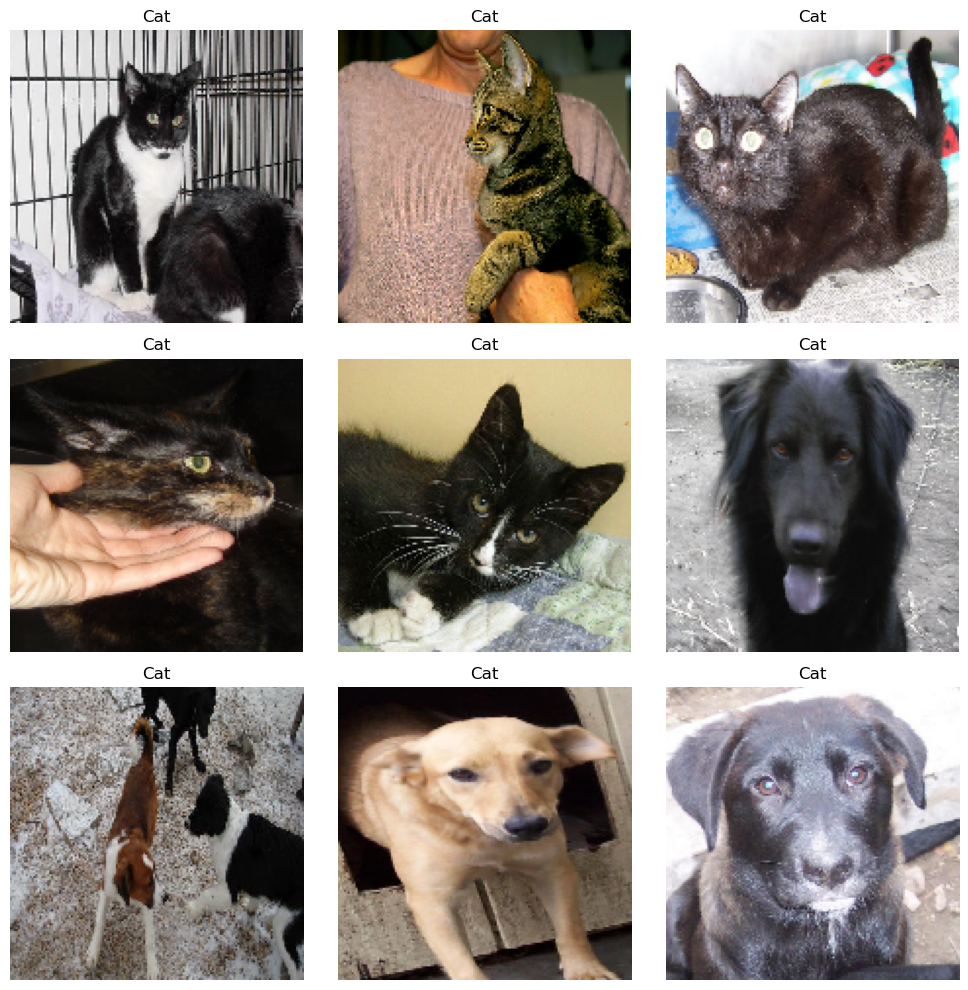

8207.jpg: Cat
8208.jpg: Cat
8209.jpg: Cat
8210.jpg: Cat
8211.jpg: Cat
9987.jpg: Cat
9988.jpg: Cat
9989.jpg: Cat
9990.jpg: Cat


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define the path to the images you want to predict
predict_dir = os.path.join(base_dir, 'prediction')

# Function to load images and preprocess them
def load_and_preprocess_images(predict_dir):
    images = []
    filenames = []
    for img_name in os.listdir(predict_dir):
        img_path = os.path.join(predict_dir, img_name)
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img_array)
        filenames.append(img_name)
    return np.array(images), filenames

# Load the images
predict_images, predict_filenames = load_and_preprocess_images(predict_dir)

# Make predictions
predictions = model.predict(predict_images)
predicted_labels = ['Dog' if pred[0] > 0.5 else 'Cat' for pred in predictions]  # Adjust labels based on your classes

# Plotting the images with their predicted labels




# Number of images to display (adjust as needed)
num_images_to_display = min(len(predict_images), 9)  # Limit to 9

# Determine grid size
rows = 3
cols = 3

plt.figure(figsize=(10, 10))
for i in range(num_images_to_display):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(predict_images[i])
    plt.title(predicted_labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print the predicted labels
for filename, label in zip(predict_filenames[:num_images_to_display], predicted_labels[:num_images_to_display]):
    print(f"{filename}: {label}")




